## 1. Plot the training curve (best accuracy ever)

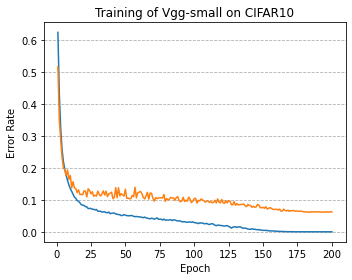

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

result_path = "results/cifar10-vgg_small/20210621140857/result.csv"
labels = ["acc1"]
acc_or_err = "err"
best_ever = False
title = "Training of Vgg-small on CIFAR10"
export_path = "test"

result = pd.read_csv(result_path)
y_vals = result.loc[:, result.columns.map(lambda s: "acc" in s)]
x_val = [i + 1 for i in range(len(y_vals))]


def get_best_ever(series):
    ret = []
    best = float('-inf')
    for d in series:
        best = max(best, d)
        ret.append(best)
    return np.array(ret)

fig, ax = plt.subplots(figsize=(5, 4))

def draw(y_val):
    if best_ever is True:
        y_val = get_best_ever(y_val)
    if acc_or_err == "err":
        y_val = 1 - y_val
    ax.plot(x_val, y_val)

for l in labels:
    for prefix in ["train", "val"]:
        y_val = y_vals[prefix + '_' + l]
        draw(y_val)
    
ax.set_title(title)
ax.set_ylabel("Error Rate" if acc_or_err == "err" else "Accuracy")
ax.set_xlabel("Epoch")
ax.yaxis.grid(linestyle='dashed')
fig.tight_layout()
if export_path:
    fig.savefig(export_path, bbox_inches="tight")


## 2. Validation progress for the different number of bits 

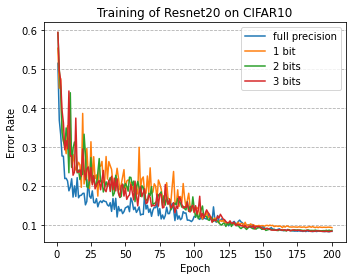

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

result_paths = [
    "results/cifar10-resnet20/20210620221039/result.csv",
    "results/cifar10-resnet20/20210620200138/result.csv",
    "results/cifar10-resnet20/20210620203402/result.csv",
    "results/cifar10-resnet20/20210620210302/result.csv",
    # "results/cifar10-resnet20/20210620214034/result.csv"
    ]
description = ["full precision", "1 bit", "2 bits", "3 bits"]
title = "Training of Resnet20 on CIFAR10"
labels = ["val_acc1"]
acc_or_err = "err"
best_ever = False
export_path = "results/test.svg"

fig, ax = plt.subplots(figsize=(5, 4))

def get_y_vals(path):
    y_vals = []
    result = pd.read_csv(result_path)
    for label in labels:
        y_val = result[label]
        y_vals.append(y_val)
    # print(y_vals)
    return y_vals

def draw(result_path):
    y_vals = get_y_vals(result_path)
    for y_val in y_vals:
        if best_ever is True:
            y_val = get_best_ever(y_val)
        if acc_or_err == "err":
            y_val = 1 - y_val
        x_val = [i + 1 for i in range(len(y_val))]
        ax.plot(x_val, y_val)
    return 


for result_path in result_paths:
    draw(result_path)

ax.set_title(title)
ax.set_ylabel("Error Rate" if acc_or_err == "err" else "Accuracy (%)")
ax.set_xlabel("Epoch")
ax.legend(description, loc="upper right")
ax.yaxis.grid(linestyle='dashed')
fig.tight_layout()
if export_path:
    fig.savefig(export_path, bbox_inches="tight")
